# Intuition for Second Order Partial Derivatives and the Hessian Matrix
> But what is a Hessian, really? 


In [1]:
#collapse
# imports
# using Plots; plotlyjs()
using PlotlyJS

# from IPython.display import HTML
# HTML(fig.to_html()) # where fig = plotly.plot(...)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14783746905688044152\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11999010926464147650\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14783746905688044152\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

The Hessian matrix appears in the optimization literature, but the intuition for how the Hessian and its inverse transform vectors is opaque to me. Let's review second order partial derivatives, and then try to build intuition for the Hessian matrix. 

For the purpose of this intuition-building exercise, we'll work with functions $\Reals^2 \mapsto \Reals^1$. I'll also use partial derivative notations $\frac{\partial}{\partial y} f(x, y) = \frac{\partial f}{\partial y} = f_y$ interchangeably. 

## 1. Partial Derivatives

Take the $\Reals^2 \mapsto \Reals^1$ function $f(x, y) = x^2 + 2y^2$.

A partial derivative is the change in an "output" variable (in our case, $f$) with respect to infinitesimal changes in an "input" variable (in our case, $x$ or $y$). For example, $\frac{\partial}{\partial y} f(x, y) = 4y$, which is to say, for any point in the domain, moving infinitsimally in the y direction changes f propotional to 4 times the y coordinate of the starting point point. 

In [2]:
f(x, y) = x^2 + 2y^2

x = 6

xlim=[-10, x]
ylim=[-10, 10]

xs = LinRange(xlim..., 101)
ys = LinRange(ylim..., 101)
zs = [f(x, y) for x in xs, y in ys]

y = 4
dy = 4
f_y(y) = 4y

f_y (generic function with 1 method)

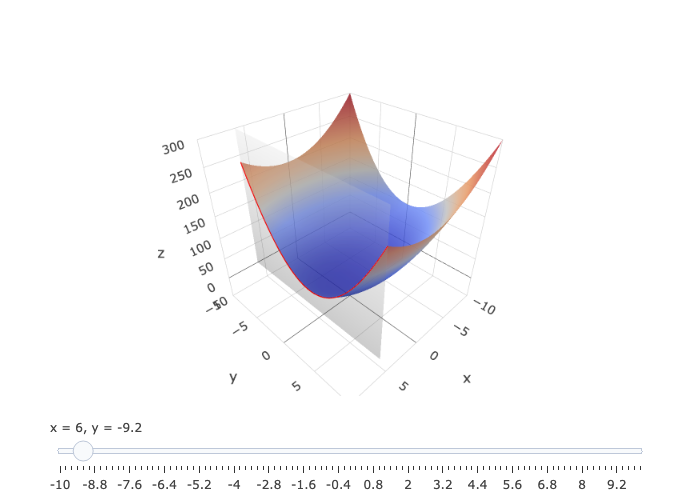

In [13]:
#collapse
# built interactive plot
traces = GenericTrace[]

push!(traces, PlotlyJS.surface(x=xs, y=ys, z=zs,
        showscale=false, opacity=0.8))
push!(traces, PlotlyJS.surface(x=[x, x+0.001], y=ylim, z=[[maximum(zs), minimum(zs)] [maximum(zs), minimum(zs)]],
        showscale=false, colorscale="Greys", opacity=0.2))
push!(traces, PlotlyJS.scatter3d(x=fill(x, size(ys)), y=ys, z=[x^2 + 2y^2 for y in ys],
        showlegend=false, mode="lines", line=attr(color="red", width=2)))

for y in ys
    push!(traces, PlotlyJS.scatter3d(x=fill(x, 2),y=[y-dy, y+dy], z=[f(x,y)-f_y(y)*dy, f(x,y)+f_y(y)*dy],
            visible=false, showlegend=false, mode="lines", line=attr(color="orange", width=5)))
end

scene = attr(
        xaxis = attr(range=[-10,10]),
        yaxis = attr(range=[-10,10]),
        zaxis = attr(range=[-50,300]))

layout = Layout(
    sliders=[attr(
        steps=[
            attr(
                label=round(y, digits=2),
                method="update",
                args=[attr(visible=[fill(true, 3); fill(false, i-1); true; fill(false, 101-i)])]
            )
            for (i, y) in enumerate(ys)
        ],
        active = y,
        currentvalue_prefix="x = 6, y = ",
        # pad_t=40
    )],
    scene = scene,
)

p = PlotlyJS.plot(traces, layout)

We can plot the function $f_y$ for every starting point:

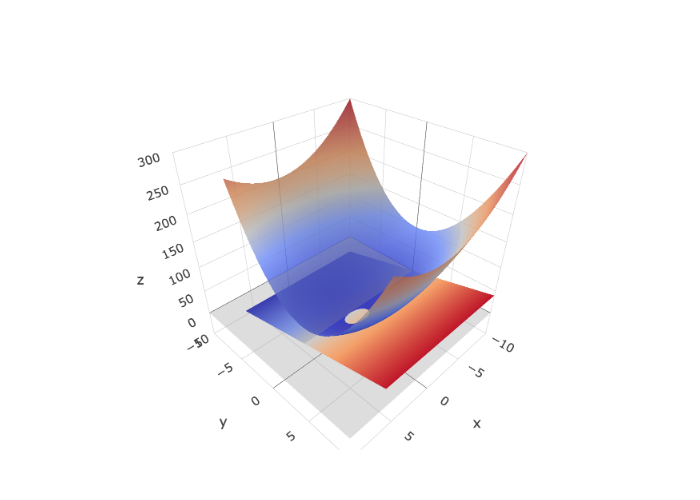

In [19]:
#collapse
# plot partial derivative of f with respect to y, f_y
traces = GenericTrace[]

push!(traces, PlotlyJS.surface(x=xs, y=ys, z=zs,
        showscale=false, opacity=0.8))
push!(traces, PlotlyJS.surface(x=ylim, y=ylim, z=[[0, 0] [0, 0]],
        showscale=false, colorscale="Greys", opacity=0.3))
push!(traces, PlotlyJS.surface(x=xs, y=ys, z=[f_y(y) for x in xs, y in ys],
        showscale=false))

plot(traces, Layout(scene=scene))

We can do the exact same exercise with $f_x$:

In [20]:
f_x(x) = 2x

f_x (generic function with 1 method)

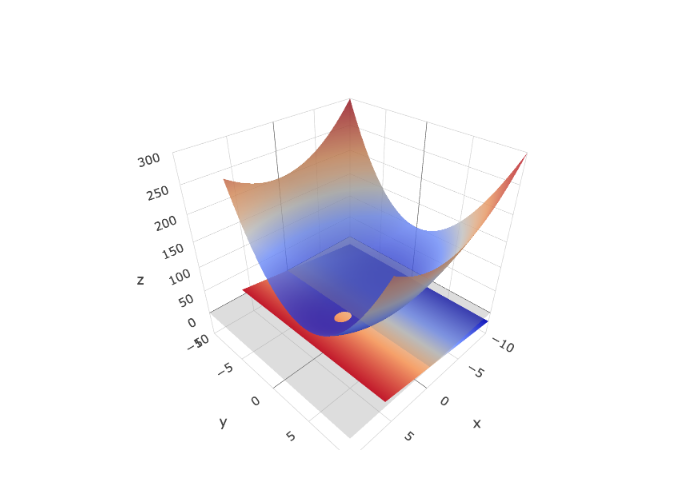

In [21]:
traces = GenericTrace[]

push!(traces, PlotlyJS.surface(x=xs, y=ys, z=zs,
        showscale=false, opacity=0.8))
push!(traces, PlotlyJS.surface(x=ylim, y=ylim, z=[[0, 0] [0, 0]],
        showscale=false, colorscale="Greys", opacity=0.3))
push!(traces, PlotlyJS.surface(x=xs, y=ys, z=[f_x(x) for x in xs, y in ys],
        showscale=false))

plot(traces, Layout(scene=scene))

So the way the second order partial derivative is defined is as a composition, e.g. $f_{xx} =  \frac{\partial}{\partial x} \left( \frac{\partial}{\partial x}\left(  f(x, y) \right) \right) $. As second derivatives do, it captures the [change in the [change in the [output variable]]] with respect to infinitesimal changes in the input variable. This notion coincides with the curvature of the function: a positive second derivative at a particular point indicates that the output variable is concave up at a that point, and a negative second derivative indicates the output variable is concave down at that point. 

In the case of this function we've chosen, $f_{xx} = 2$ and $f_{yy} = 4$ which informs us that $f$ is concave up everywhere in the domain, which makes sense from looking at the plot. 

However, we've omitted the "mixed" partial derivatives here: $f_{xy}$ and $f_{yx}$. We can compute them to both be zero for this particular function. What does that tell us? 

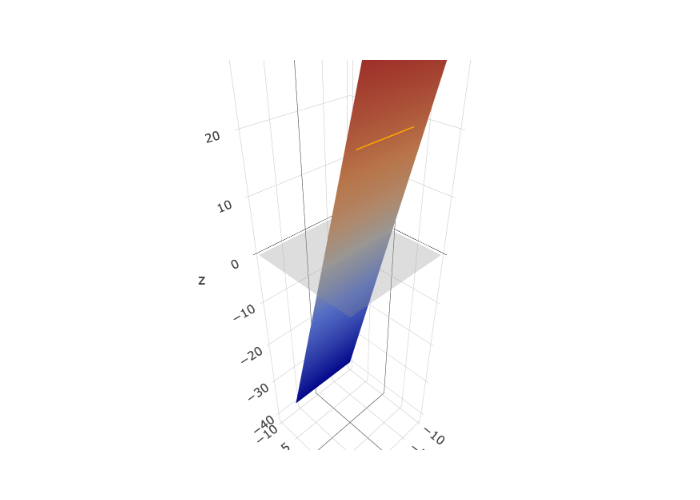

In [26]:
#collapse
# plot partial derivative of f with respect to y, f_y
traces = GenericTrace[]

push!(traces, PlotlyJS.surface(x=ylim, y=ylim, z=[[0, 0] [0, 0]],
        showscale=false, colorscale="Greys", opacity=0.3))
push!(traces, PlotlyJS.surface(x=xs, y=ys, z=[f_y(y) for x in xs, y in ys],
        showscale=false))
push!(traces, PlotlyJS.scatter3d(x=[-7, 4], y=[5, 5], z=[f_y(5), f_y(5)],
        showlegend=false, mode="lines", line=attr(color="orange", width=5)))

plot(traces, Layout(scene=scene))

In [10]:
xs = LinRange(-10, 10, 100)
ys = LinRange(-10, 10, 100)
zs = [x^2 + 2y^2 for x in xs, y in ys]

# z2s = LinRange(minimum(zs), maximum(zs), 2)
# y2s = [2 for x in xs, zs in z2s]

surface(xs, zs, ys, colorbar=false, color=cgrad(:blues))

<!DOCTYPE html>
 
 
 Plots.jl

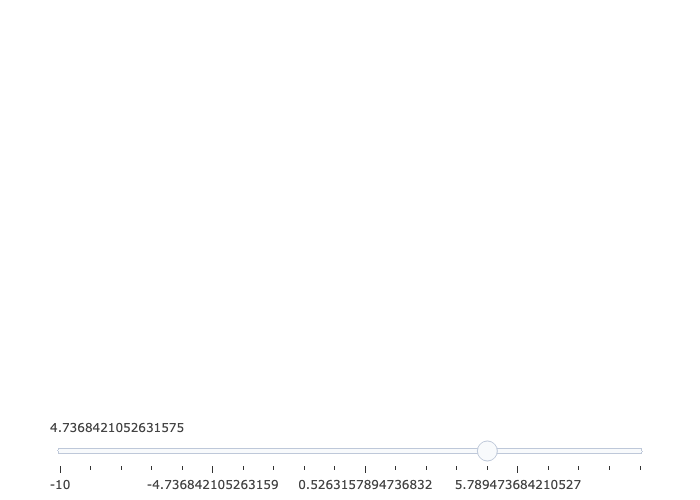

In [12]:

# what is the zero doing after the attr in the args list?


for y in LinRange(ylim..., 20)

    push!(traces, scatter3d(;x=fill(x, 2), y=[y-dy, y+dy], z=[f(x,y)-f_y(y)*dy, f(x,y)+f_y(y)*dy], mode="lines", visible=False))

end

layout = Layout(
    sliders=[attr(
        steps=[
            attr(
                label=y,
                method="update",
                args=[attr(visible=[fill(false, 20); 1; fill(false, 20)]   )]
            )
            for y in LinRange(ylim..., 20)
        ],
        active = 14,
        # currentvalue_prefix="Assets: ",
        # pad_t=40
    )],
    # width=500,
    # height=500,
)

p = plot(traces, layout)


In [ ]:
gradient field

In [81]:
?attr

search: attr attr! plotattr scatter scatter! scattergl scatter3d scatter3d!



No documentation found.

`PlotlyBase.attr` is a `Function`.

```
# 2 methods for generic function "attr":
[1] attr() in PlotlyBase at /Users/alex/.julia/packages/PlotlyBase/GDbp9/src/traces_layouts.jl:46
[2] attr(fields; kwargs...) in PlotlyBase at /Users/alex/.julia/packages/PlotlyBase/GDbp9/src/traces_layouts.jl:46
```


gradient field

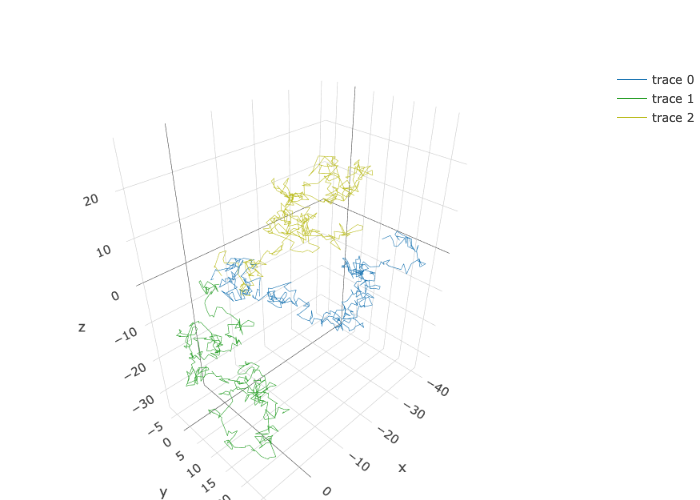

In [114]:
function random_line()
    n = 400
    rw() = cumsum(randn(n))
    trace1 = PlotlyJS.scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                        marker=attr(color="#1f77b4", size=12, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="#1f77b4", width=1))
    trace2 = PlotlyJS.scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                        marker=attr(color="#9467bd", size=12, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="rgb(44, 160, 44)", width=1))
    trace3 = PlotlyJS.scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                        marker=attr(color="#bcbd22", size=12, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="#bcbd22", width=1))
    layout = Layout(autosize=false, width=500, height=500,
                    margin=attr(l=0, r=0, b=0, t=65))
    PlotlyJS.plot([trace1, trace2, trace3], layout)
end
random_line()